In [ ]:
import numpy as np
from utils import *
from tqdm import trange , tqdm
import matplotlib.pyplot as plt

## L2 norm


In [ ]:
sift_features_with_id=np.load('server_dict_no_kp.npy',allow_pickle=True).item()
sift_features_for_training=np.load('train_features.npy')
client_features_with_id=np.load('client_dict_no_kp.npy',allow_pickle=True).item()

In [ ]:
b_d_pair=[(4,3),(4,5),(5,7)]
for i in range(len(b_d_pair)):
    vt=VocabularyTree(b_d_pair[i][0],b_d_pair[i][1],sift_features_for_training)
    vt.build_tree()
    vt.generate_database_index(sift_features_with_id)
    tot1=0
    tot5=0
    for f in client_features_with_id:
        scores=vt.evaluate_querry(client_features_with_id[f][0][1])
        if f in list(scores.keys())[0:5]:
            tot5+=1
        if f == list(scores.keys())[0]:
            tot1+=1
    print('Branch : ',b_d_pair[i][0],' and Depth : ',b_d_pair[i][1])
    print('average top-1:',tot1/50)
    print('average top-5:',tot5/50)

Branch :  4  and Depth :  3
average top-1: 0.36
average top-5: 0.66
Branch :  4  and Depth :  5
average top-1: 0.56
average top-5: 0.72
Branch :  5  and Depth :  7
average top-1: 0.52
average top-5: 0.76


## COSINE SIM

In [ ]:
b_d_pair=[(4,3),(4,5),(5,7)]
for i in range(len(b_d_pair)):
    vt=VocabularyTree(b_d_pair[i][0],b_d_pair[i][1],sift_features_for_training)
    vt.build_tree()
    vt.generate_database_index(sift_features_with_id)
    tot1=0
    tot5=0
    for f in client_features_with_id:
        scores=vt.evaluate_querry(client_features_with_id[f][0][1])
        if f in list(scores.keys())[0:5]:
            tot5+=1
        if f == list(scores.keys())[0]:
            tot1+=1
    print('Branch : ',b_d_pair[i][0],' and Depth : ',b_d_pair[i][1])
    print('average top-1:',tot1/50)
    print('average top-5:',tot5/50)

Branch :  4  and Depth :  3
average top-1: 0.44
average top-5: 0.74
Branch :  4  and Depth :  5
average top-1: 0.48
average top-5: 0.72
Branch :  5  and Depth :  7
average top-1: 0.5
average top-5: 0.64


## Train with 1000 sift l1 norm

In [ ]:
sift_features_with_id=np.load('server_dict_no_kp_1000.npy',allow_pickle=True).item()
sift_features_for_training=np.load('train_features_1000.npy')
client_features_with_id=np.load('client_dict_no_kp_1000.npy',allow_pickle=True).item()

In [ ]:
b_d_pair=[(4,3),(4,5),(5,7)]
for i in range(len(b_d_pair)):
    vt=VocabularyTree(b_d_pair[i][0],b_d_pair[i][1],sift_features_for_training)
    vt.build_tree()
    vt.generate_database_index(sift_features_with_id)
    tot1=0
    tot5=0
    for f in client_features_with_id:
        scores=vt.evaluate_querry(client_features_with_id[f][0][1])
        if f in list(scores.keys())[0:5]:
            tot5+=1
        if f == list(scores.keys())[0]:
            tot1+=1
    print('Branch : ',b_d_pair[i][0],' and Depth : ',b_d_pair[i][1])
    print('average top-1:',tot1/50)
    print('average top-5:',tot5/50)
    

Branch :  4  and Depth :  3
average top-1: 0.58
average top-5: 0.74
Branch :  4  and Depth :  5
average top-1: 0.62
average top-5: 0.8
Branch :  5  and Depth :  7
average top-1: 0.64
average top-5: 0.8


## Bagging

In [ ]:
from tqdm import tqdm

In [ ]:
b_d_pair=[(4,3),(4,5),(5,7)]
tot1_list=[]
tot5_list=[]
for bag in trange(20):
    for i in range(len(b_d_pair)):
        vt=VocabularyTree(b_d_pair[i][0],b_d_pair[i][1],sift_features_for_training)
        vt.build_tree()
        vt.generate_database_index(sift_features_with_id)
        tot1=0
        tot5=0
        for f in client_features_with_id:
            scores=vt.evaluate_querry(client_features_with_id[f][0][1])
            if f in list(scores.keys())[0:5]:
                tot5+=1
            if f == list(scores.keys())[0]:
                tot1+=1
        tot1_list.append(tot1/50)
        tot5_list.append(tot5/50)

    

100%|██████████| 20/20 [2:51:13<00:00, 513.65s/it]


In [ ]:
np.save('tot1_list_bagging.npy',tot1_list)

In [ ]:
np.save('tot5_list_bagging.npy',tot5_list)

In [ ]:
tot1_array = np.array(tot1_list)
nslices = 20
tot1_array=tot1_array.reshape((nslices, -1))


In [ ]:
tot1_array.mean(axis=0)

array([0.544, 0.649, 0.637])

In [ ]:
tot5_array = np.array(tot5_list)
nslices = 20
tot5_array=tot5_array.reshape((nslices, -1))
tot5_array.mean(axis=0)

array([0.755, 0.794, 0.79 ])

## Ensemble

In [ ]:
sift_features_with_id=np.load('server_dict_no_kp.npy',allow_pickle=True).item()
sift_features_for_training=np.load('train_features.npy')
client_features_with_id=np.load('client_dict_no_kp.npy',allow_pickle=True).item()

In [ ]:
b_d_pair=[(4,3),(4,5),(5,7)]
vt_list = []

for i in trange(len(b_d_pair)):
    vt_sublist = []
    for bag in trange(10):
        vt=VocabularyTree(b_d_pair[i][0],b_d_pair[i][1],sift_features_for_training)
        vt.build_tree()
        vt.generate_database_index(sift_features_with_id)
        vt_sublist.append(vt)
    vt_list.append(vt_sublist)

In [ ]:
for i in range(len(b_d_pair)):
    tot1=0
    tot5=0

    with tqdm(total=len(client_features_with_id),leave=False) as pbar:
        for f in client_features_with_id:
            score_top5 = {}
            score_top1 = {}

            for vt_i in vt_list[i]:
                scores=vt_i.evaluate_querry(client_features_with_id[f][0][1])
                guesses = list(scores.keys())[0:5]

                for s in guesses:
                    if s in score_top5.keys():
                        score_top5[s] += 1
                    else:
                        score_top5[s] = 1

                s1 = guesses[0]
                
                if s1 in score_top1.keys():
                    score_top1[s1] += 1
                else:
                    score_top1[s1] = 1

            sorted_top_5 = {k: v for k, v in sorted(score_top5.items(), key=lambda item: item[1])}
            sorted_top_5_keys = list(sorted_top_5.keys())[-5:]

            sorted_top_1 = {k: v for k, v in sorted(score_top1.items(), key=lambda item: item[1])}
            sorted_top_1_key = list(sorted_top_1.keys())[-1]

            print("Total scoring list:")
            print(score_top5)

            print(F"Got sorted top 5:")
            print(sorted_top_5_keys)
            print("and top 1:")
            print(sorted_top_1_key)

            if f in sorted_top_5_keys:
                tot5+=1
            if f == sorted_top_1_key:
                tot1+=1

            pbar.update(1)

    print('Branch : ',b_d_pair[i][0],' and Depth : ',b_d_pair[i][1])
    print('ensemble top-1:',tot1/50)
    print('ensemble top-5:',tot5/50)

    

In [ ]:
vt_test=VocabularyTree(b=3,depth=2,sift_features_for_training)
vt_test.build_tree()


In [ ]:
n_leaves = np.zeros((3,10))

for i in range(3): 
    for j,_ in enumerate(vt_list[i]):
        count = 0
        for n in vt_list[i][j].imageFreqInLeaves.values():
            if n:
                count +=1
            
        n_leaves[i,j] = count
    

In [ ]:
print(np.mean(n_leaves,1))
np.mean(n_leaves,1)/np.array([64,1024,78125])

[  55.8  445.9 1380.8]


array([0.871875  , 0.43544922, 0.01767424])

[]

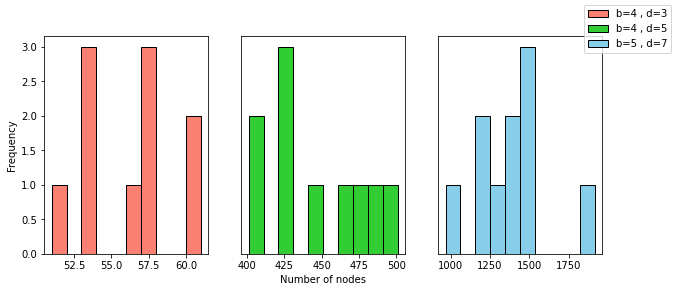

In [ ]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(n_leaves[0,:], bins=10, color="salmon",label='b=4 , d=3',ec='black')  # no
ax2.hist(n_leaves[1,:], bins=10, color="limegreen",label='b=4 , d=5',ec='black')   # nothing
ax3.hist(n_leaves[2,:], bins=10, color="skyblue",label='b=5 , d=7',ec='black')   # yes
fig.legend(loc='upper right')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Number of nodes')
ax2.set_yticks([])
ax3.set_yticks([])

In [ ]:
fig.savefig('hist_n_nodes.png')